### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [127]:
data = pd.read_csv('data/coupons.csv')

In [128]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [129]:
data.shape

(12684, 26)

In [130]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [131]:
data.value_counts()

destination      passanger  weather  temperature  time  coupon                 expiration  gender  age  maritalStatus    has_children  education                               occupation                       income           car                                       Bar    CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y
Home             Alone      Rainy    55           10PM  Coffee House           1d          Female  26   Single           0             Bachelors degree                        Office & Administrative Support  $87500 - $99999  do not drive                              gt8    less1        1~3        1~3                   1~3               1                 0                  0                  1               0              0    1
No Urgent Place  Friend(s)  Sunny    80           6PM   Restaurant(<20)        2h          Male    26   Single           0             Gradua

In [132]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [133]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [15]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [16]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [135]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [134]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [137]:
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [139]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Observations on data 

- There are 26 columns in the dataset
- The dataset has 12684 rows
- The dataset has 26 columns
- The dataset has 1 target variable Y which is the acceptance of the coupon
- The dataset has 6 columns that have missing values. These are car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50.
- The dataset has 8 columns that have numerical values. They are temperature, has_children, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp and Y
- Although the age column is numberic for some reason metrics for it are not being calculated. The type seems to be of object type. So, this column should be converted to numeric type. 

3. Decide what to do about your missing data -- drop, replace, other...

# Actions for cleaning/filling the missing data 
- For missing values in the columns car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50, I will add "unknown" strings. 
- I will convert age column to numeric.

In [140]:
# Filling missing values
data['car'] = data['car'].fillna('unknown')
data['Bar'] = data['Bar'].fillna('unknown')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('unknown')
data['CarryAway'] = data['CarryAway'].fillna('unknown')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('unknown')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('unknown')
# Converting age column to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')
# Dropping missing values
# data = data.dropna()
# data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   10349 non-null  float64
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  car                   12684 non-null  object 
 15  Bar                

4. What proportion of the total observations chose to accept the coupon?



In [120]:
percent = data['Y'].value_counts()/len(data)
answer = percent[1]*100
print(str(round(answer, 2)) +'% of the total observations chose to accept the coupon')

56.84% of the total observations chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

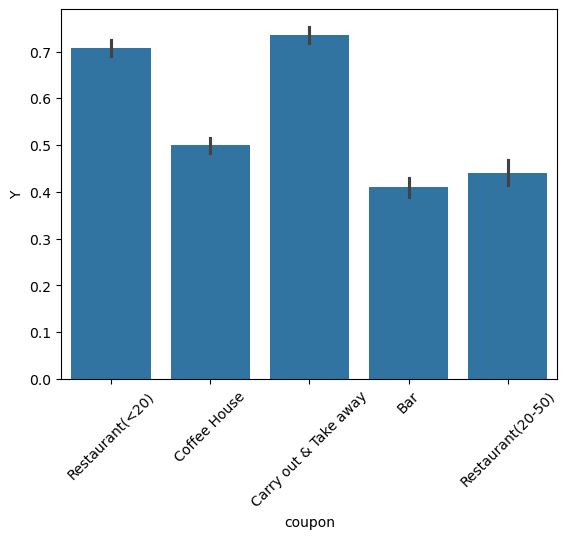

In [141]:
sns.barplot(x='coupon', y='Y', data=data)
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

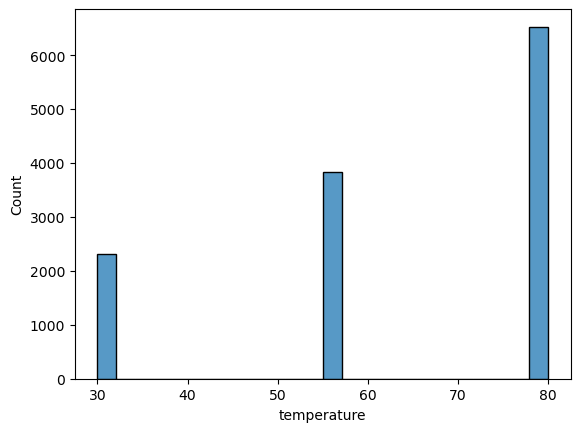

In [142]:
sns.histplot(data['temperature'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [143]:
df_bar = data[data['coupon'] == 'Bar']
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21.0,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21.0,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21.0,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26.0,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26.0,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26.0,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26.0,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [144]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           2017 non-null   object 
 1   passanger             2017 non-null   object 
 2   weather               2017 non-null   object 
 3   temperature           2017 non-null   int64  
 4   time                  2017 non-null   object 
 5   coupon                2017 non-null   object 
 6   expiration            2017 non-null   object 
 7   gender                2017 non-null   object 
 8   age                   1647 non-null   float64
 9   maritalStatus         2017 non-null   object 
 10  has_children          2017 non-null   int64  
 11  education             2017 non-null   object 
 12  occupation            2017 non-null   object 
 13  income                2017 non-null   object 
 14  car                   2017 non-null   object 
 15  Bar                   201

2. What proportion of bar coupons were accepted?


In [148]:
percent = df_bar['Y'].value_counts()/len(df_bar)
answer = percent[1]*100
print('Around ' + str(round(answer,2)) + '% of the coupons were accepted')

Around 41.0% of the coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [115]:
bar_visits_3_or_less_and_coupon_accepted = df_bar[df_bar['Bar'].isin(['never', 'less1', '1~3'])]['Y'].value_counts()/len(df_bar[df_bar['Bar'].isin(['never', 'less1', '1~3'])])
print(f'Acceptance percentage for bar visits 3 or fewer times a month: {round(bar_visits_3_or_less_and_coupon_accepted[1]*100, 2)}%')
bar_visits_4_or_more_and_coupon_accepted = df_bar[df_bar['Bar'].isin(['4~8', 'gt8'])]['Y'].value_counts()/len(df_bar[df_bar['Bar'].isin(['4~8', 'gt8'])])
print(f'Acceptance percentage for bar visits 4 or more times a month: {round(bar_visits_4_or_more_and_coupon_accepted[1]*100, 2)}%')

Acceptance percentage for bar visits 3 or fewer times a month: 37.06%
Acceptance percentage for bar visits 4 or more times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [149]:
more_than_once_a_month=['1~3', '4~8', 'gt8']
df_bar_more_than_once_a_month = df_bar[df_bar['Bar'].isin(more_than_once_a_month)]
df_bar_more_than_once_a_month_and_over_25 = df_bar_more_than_once_a_month[df_bar_more_than_once_a_month['age'] > 25]

answer1 = (df_bar_more_than_once_a_month['Y'].value_counts()/len(df_bar_more_than_once_a_month))[1]
print(str(round(answer1*100, 2)) + '% of the drivers who go to a bar more than once accept the coupon shown')

answer2 = (df_bar_more_than_once_a_month_and_over_25['Y'].value_counts()/len(df_bar_more_than_once_a_month_and_over_25))[1]
print(str(round(answer2*100, 2)) + '% of the drivers who go to a bar more than once and over the age of 25 accept the coupon shown')

68.79% of the drivers who go to a bar more than once accept the coupon shown
69.97% of the drivers who go to a bar more than once and over the age of 25 accept the coupon shown


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [150]:
df_bar['passanger'].value_counts()

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [151]:
passengers_other_then_kids  = ['Alone', 'Friend(s)', 'Partner']
more_than_once_a_month=['1~3', '4~8', 'gt8']
df_bar_more_than_once_a_month = df_bar[df_bar['Bar'].isin(more_than_once_a_month)]
df_bar_more_than_once_a_month_and_riders_other_than_kids = df_bar_more_than_once_a_month[df_bar_more_than_once_a_month['passanger'].isin(passengers_other_then_kids)]

answer1 = (df_bar_more_than_once_a_month['Y'].value_counts()/len(df_bar_more_than_once_a_month))[1]
print(str(round(answer1*100, 2)) + '% of the drivers who go to a bar more than once accept the coupon shown')

answer2 = (df_bar_more_than_once_a_month_and_riders_other_than_kids['Y'].value_counts()/len(df_bar_more_than_once_a_month_and_riders_other_than_kids))[1]
print(str(round(answer2*100, 2)) + '% of the drivers who go to a bar more than once and who have riders other than kids accept the coupon shown')

68.79% of the drivers who go to a bar more than once accept the coupon shown
71.32% of the drivers who go to a bar more than once and who have riders other than kids accept the coupon shown


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [157]:
df_bar['maritalStatus'].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [158]:
# Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
df_bar_more_than_once_a_month_and_riders_other_than_kids = df_bar_more_than_once_a_month[df_bar_more_than_once_a_month['passanger'].isin(passengers_other_then_kids)]
df_bar_more_than_once_a_month_and_riders_other_than_kids_and_not_windowed = df_bar_more_than_once_a_month_and_riders_other_than_kids.loc(df_bar_more_than_once_a_month_and_riders_other_than_kids['maritalStatus'] != 'Widowed')
df_bar_more_than_once_a_month_and_riders_other_than_kids_and_not_windowed

TypeError: unhashable type: 'Series'

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  